In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import pylab
import time
import copy
rs = np.random.RandomState(seed=42)

In [2]:
class Aircraft:
    def __init__(self,position,end_position):
        self.position = position
        self.end_position = end_position
        
    # place aircraft at x and y location
    def move_aircraft(self,new_position):
        self.position[0] = new_position[0]
        self.position[1] = new_position[1]
        
    # return position
    def get_position(self):
        return self.position
    
    # reached end position
    def reached_end_position(self):
        if self.position == self.end_position:
            return True
        else:
            return False
    
    # Get the distance to given location
    def distance_to(self,position):
        x_distance = abs(self.get_position()[0]-position[0])
        y_distance = abs(self.get_position()[1]-position[1])
        distance = np.sqrt((x_distance^2)+(y_distance^2))
        return distance


In [3]:
class TrajectoryManager:
    def __init__(self,aircraft_list,weather_map):
        self.aircraft_list = aircraft_list
        self.weather_map = weather_map
        
    # add an aircraft
    def add_aircraft(self,aircraft):
        self.aircraft_list.append(aircraft)
        
    # generate weather map
    def generate_weather_map(self,n):
        self.weather_map = np.random.random_integers(0,3,(n,n))
                
    # get an aircraft
    def get_aircraft(self,index):
        return self.aircraft_list[index]
    
    # update aircraft
    def update_aircraft(self,index,new_position):
        self.aircraft_list[index].position = new_position
    
    # get weather map
    def get_weather_map(self):
        return self.weather_map
    
    # get number of aircraft
    def number_of_aircraft(self):
        return len(self.aircraft_list)
    
    # get weather risk
    def get_weather_risk(self,position):
        return self.get_weather_map()[position[0],position[1]]
    
    # aircraft obstruction
    def aircraft_obstruction(self,moving_aircraft,k,n):
        position = moving_aircraft.get_position()
        obstruction_list = []
        
        # check for aircraft obstruction
        for index in range(len(self.aircraft_list)):
            for i in range(-k,k+1):
                for j in range(-k,k+1):
                    if not (i == 0) and (j == 0):
                        if self.get_aircraft(index) == [position[0]+i,position[1]+j]:
                            obstruction_list.append([position[0]+i,position[1]+j])
        return obstruction_list

In [4]:
class Trajectory(TrajectoryManager):
    def __init__(self,aircraft_list,weather_map,trajectory,cost):
        TrajectoryManager.__init__(self,aircraft_list,weather_map)
        self.trajectory = trajectory
        self.cost = cost
        
    def __deepcopy__(self, memo):
        return Trajectory(copy.deepcopy(self.aircraft_list,memo),copy.deepcopy(self.weather_map,memo),copy.deepcopy(self.trajectory,memo),copy.deepcopy(self.cost, memo))
        
    # construct an empty trajectory
    def trajectory(self):
        for i in range(TrajectoryManager.number_of_aircraft()):
            self.trajectory.add([])
            
    # get trajectory
    def get_trajectory(self):
        return self.trajectory
    
    # dijkstra's algorithm
    def dijkstra_trajectory(self,k,n):
        Done = False
        timeout = time.time() + 10   # 10 sec
        
        # Create an empty list
        list_of_lists = []
        # Iterate over a sequence of numbers from 0 to 4
        for i in range(len(self.aircraft_list)):
            # In each iteration, add an empty list to the main list
            list_of_lists.append([])
        self.trajectory = list_of_lists
        
        # Create an empty list
        list_of_lists2 = []
        # Iterate over a sequence of numbers from 0 to 4
        for i in range(len(self.aircraft_list)):
            # In each iteration, add an empty list to the main list
            list_of_lists2.append([])
        self.cost = list_of_lists2.copy()
        
        move = []
        while (not Done):
            for i in range(len(self.aircraft_list)):
                #print(i)
                aircraft = self.get_aircraft(i)
                if not aircraft.reached_end_position():
                    obstruction_list = self.aircraft_obstruction(aircraft,k,n)
                    for j in range(len(self.trajectory[i])):
                        obstruction_list.append(self.trajectory[i][j])
                    position = []
                    pos = []
                    temp_cost = []

                    count = 0
                    for i in range(-k,k+1):
                        for j in range(-k,k+1):
                            temp = [aircraft.get_position()[0]+i,aircraft.get_position()[1]+j]
                            print(temp)
                            if (temp not in obstruction_list) and (not((i==0) and (j==0))) and (temp[0] >= 0) and (temp[0] <= n-1) and (temp[1] >= 0) and (temp[1] <= n-1):
                                pos.append(temp)
    
                            count += 1
                    
                    #print(new_position)
                    # general case
                    count = 0
                    for new_position in pos:
                        if new_position[0] == 0 and new_position[1] != 0:
                            cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                           self.get_weather_risk([new_position[0],new_position[1]])
                        elif new_position[1] == 0 and new_position[0] != 0:
                            cost_weather = self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                           self.get_weather_risk([new_position[0],new_position[1]])
                        elif new_position[0] == 0 and new_position[1] == 0:
                            cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                        elif new_position[0] >= n-1 and new_position[1] < n-1:
                            cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                           self.get_weather_risk([new_position[0]-1,new_position[1]])
                        elif new_position[1] >= n-1 and new_position[0] < n-1:
                            cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                           self.get_weather_risk([new_position[0],new_position[1]-1])
                        elif new_position[0] >= n-1 and new_position[1] >= n-1:
                            cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                        else:
                            cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                             self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                             self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                             self.get_weather_risk([new_position[0],new_position[1]])

                        cost_distance = aircraft.distance_to(new_position)
                        temp_cost.append(cost_weather+cost_distance)
                        count += 1
                    idx = np.where(temp_cost == np.amin(temp_cost))
                    idx = idx[0][0].astype(int)
                    self.cost[i].append(temp_cost[idx])
                    self.update_aircraft(i,pos[idx])
                    self.trajectory[i].append(aircraft.get_position())
                    #print(self.trajectory)
                    if time.time() > timeout:
                        Done = True
                else:
                    done_count = 0
                    for i in range(len(self.aircraft_list)):
                        aircraft = self.get_aircraft(i)
                        if aircraft.reached_end_position():
                            done_count += 1
                    if done_count == len(self.aircraft_list):
                        Done = True
                        
    # reset state
    def reset_state(self):
        # reset aircraft positions at index
        index = 1
        for i in range(len(self.aircraft_list)):
            self.update_aircraft(i,self.trajectory[i][0])
            # delete trajectory after index
            self.trajectory[i] = self.trajectory[i][0:index]
            # delete cost after index
            self.cost[i] = self.cost[i][0:index]
            
                
        
    # generate trajectory
    def generate_trajectory(self,k,n):
        Done = False
        timeout = time.time() + 10   # 10 sec
        
        # Create an empty list
        list_of_lists = []
        # Iterate over a sequence of numbers from 0 to 4
        for i in range(len(self.aircraft_list)):
            # In each iteration, add an empty list to the main list
            list_of_lists.append([])
        self.trajectory = list_of_lists
        
        # Create an empty list
        list_of_lists2 = []
        # Iterate over a sequence of numbers from 0 to 4
        for i in range(len(self.aircraft_list)):
            # In each iteration, add an empty list to the main list
            list_of_lists2.append([])
        self.cost = list_of_lists2.copy()
        
        for i in range(len(self.aircraft_list)):
            self.trajectory[i].append(self.aircraft_list[i].get_position())

        
        move = []
        while (not Done):
            for i in range(len(self.aircraft_list)):
                #print(i)
                aircraft = self.get_aircraft(i)
                if not aircraft.reached_end_position():
                    obstruction_list = self.aircraft_obstruction(aircraft,k,n)

                    move = [np.random.randint(-k,k+1),np.random.randint(-k,k+1)]
                    while ([aircraft.get_position()[0]+move[0],aircraft.get_position()[1]+move[1]] in obstruction_list) or (move == [0,0]) or\
                        (aircraft.get_position()[0]+move[0] < 0) or (aircraft.get_position()[0]+move[0] > n-1) or\
                        (aircraft.get_position()[1]+move[1] < 0) or (aircraft.get_position()[1]+move[1] > n-1):
                        move = [np.random.randint(-k,k+1),np.random.randint(-k,k+1)]
                    
                    new_position = [aircraft.get_position()[0]+move[0],aircraft.get_position()[1]+move[1]]
                    #print(new_position)
                    # general case
                    if new_position[0] == 0 and new_position[1] != 0:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                       self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[1] == 0 and new_position[0] != 0:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[0] == 0 and new_position[1] == 0:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[0] >= n-1 and new_position[1] < n-1:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0]-1,new_position[1]])
                    elif new_position[1] >= n-1 and new_position[0] < n-1:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0],new_position[1]-1])
                    elif new_position[0] >= n-1 and new_position[1] >= n-1:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                    else:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                         self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                         self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                         self.get_weather_risk([new_position[0],new_position[1]])
                    
                    cost_distance = aircraft.distance_to(new_position)
                    self.cost[i].append((cost_weather*0+cost_distance))
                    self.update_aircraft(i,new_position)
                    self.trajectory[i].append(aircraft.get_position())
                    #print(self.trajectory)
                    if time.time() > timeout:
                        Done = True
                else:
                    done_count = 0
                    for i in range(len(self.aircraft_list)):
                        aircraft = self.get_aircraft(i)
                        if aircraft.reached_end_position():
                            done_count += 1
                    if done_count == len(self.aircraft_list):
                        Done = True

    def edit_trajectory(self,index,k,n):
        Done = False
        timeout = time.time() + 10   # 10 sec
        move = []
        
        # reset aircraft positions at index
        for i in range(len(self.aircraft_list)):
            self.update_aircraft(i,self.trajectory[i][index])
            # delete trajectory after index
            self.trajectory[i] = self.trajectory[i][0:index]
            # delete cost after index
            self.cost[i] = self.cost[i][0:index]
            
        
        while (not Done):
            for i in range(len(self.aircraft_list)):
                #print(i)
                aircraft = self.get_aircraft(i)
                if not aircraft.reached_end_position():
                    obstruction_list = self.aircraft_obstruction(aircraft,k,n)

                    move = [np.random.randint(-k,k+1),np.random.randint(-k,k+1)]
                    while ([aircraft.get_position()[0]+move[0],aircraft.get_position()[1]+move[1]] in obstruction_list) or (move == [0,0]) or\
                        (aircraft.get_position()[0]+move[0] < 0) or (aircraft.get_position()[0]+move[0] > n-1) or\
                        (aircraft.get_position()[1]+move[1] < 0) or (aircraft.get_position()[1]+move[1] > n-1):
                        move = [np.random.randint(-k,k+1),np.random.randint(-k,k+1)]
                    
                    new_position = [aircraft.get_position()[0]+move[0],aircraft.get_position()[1]+move[1]]
                    #print(new_position)
                    # general case
                    if new_position[0] == 0 and new_position[1] != 0:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                       self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[1] == 0 and new_position[0] != 0:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[0] == 0 and new_position[1] == 0:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                    elif new_position[0] >= n-1 and new_position[1] < n-1:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0]-1,new_position[1]])
                    elif new_position[1] >= n-1 and new_position[0] < n-1:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                       self.get_weather_risk([new_position[0],new_position[1]-1])
                    elif new_position[0] >= n-1 and new_position[1] >= n-1:
                        cost_weather = self.get_weather_risk([new_position[0],new_position[1]])
                    else:
                        cost_weather = self.get_weather_risk([new_position[0]-1,new_position[1]-1])+\
                                         self.get_weather_risk([new_position[0],new_position[1]-1])+\
                                         self.get_weather_risk([new_position[0]-1,new_position[1]])+\
                                         self.get_weather_risk([new_position[0],new_position[1]])
                    
                    cost_distance = aircraft.distance_to(new_position)
                    self.cost[i].append((cost_weather*0+cost_distance))
                    self.update_aircraft(i,new_position)
                    self.trajectory[i].append(aircraft.get_position())
                    #print(self.trajectory)
                    if time.time() > timeout:
                        Done = True
                else:
                    done_count = 0
                    for i in range(len(self.aircraft_list)):
                        aircraft = self.get_aircraft(i)
                        if aircraft.reached_end_position():
                            done_count += 1
                    if done_count == len(self.aircraft_list):
                        Done = True
                    
                



In [5]:
def SimulatedAnnealing(curr_z,next_z,T):
    diff = next_z - curr_z
    # minimize
    if (diff < 0):
        return 1
    else:
        return 1/np.exp(-1*diff/T)

In [6]:
def exp_temp_schedule(T, decay_factor=1.1):
    return T/decay_factor

In [42]:
def next_state_window(curr_s, window_size=1):
    
    r = np.abs(rs.random())
    r -= 0.5
    r *= window_size
    
    return curr_s + r

In [43]:
# Generate problem:
num_aircraft = 1
n = 5
k = 1

# Create trajectory
trajectories = Trajectory([],[],[],[])

# Create and add aircraft
for i in range(num_aircraft):
    position = [np.random.randint(0,n),np.random.randint(0,n)]
    end_position = [np.random.randint(0,n),np.random.randint(0,n)]
    while end_position == position:
        end_position = [np.random.randint(0,n),np.random.randint(0,n)]
    trajectories.add_aircraft(Aircraft(position,end_position))
    
#print(trajectories.aircraft_list[0].end_position)
# Generate weather map
trajectories.generate_weather_map(n)

trajectories_start = trajectories


C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  if sys.path[0] == '':


[[1 3 3 1 1]
 [2 2 2 1 1]
 [0 2 0 0 3]
 [2 3 2 1 3]
 [1 3 0 1 3]]
end position  [0, 4]
trajectory  0   [[4, 0], [3, 1], [2, 0], [3, 1], [2, 1], [2, 2], [1, 1], [1, 0], [0, 1], [1, 2], [2, 2], [2, 1], [1, 0], [2, 0], [3, 0], [2, 0], [1, 1], [2, 0], [2, 1], [1, 2], [2, 2], [1, 2], [2, 3], [3, 3], [2, 4], [2, 3], [2, 4], [2, 3], [2, 2], [1, 2], [0, 2], [0, 1], [1, 1], [0, 2], [1, 3], [0, 4]]
cost:  81.46370569174344


<Figure size 432x288 with 0 Axes>

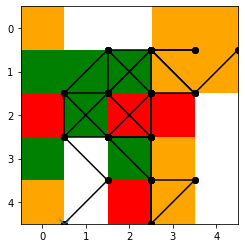

In [44]:
# Generate trajectory

index = 0
trajectories.generate_trajectory(k,n)
# create discrete colormap
cmap = colors.ListedColormap(['red', 'orange','green','white'])
bounds = [0,n,n*2]
norm = colors.BoundaryNorm(bounds, cmap.N)
# create color map for graphing
new_map = np.zeros([n*2,n*2])
Done = False
print(trajectories.weather_map)
i = 0

for color_map in trajectories.weather_map:
    j = 0
    for color in color_map:
        new_map[i,j] = color
        new_map[i+1,j] = color
        new_map[i,j+1] = color
        new_map[i+1,j+1] = color
        j+=2
    i+=2

count = 0
for aircraft_trajectory in trajectories.trajectory:
    print('end position ',trajectories.aircraft_list[index].end_position)
    print('trajectory ',index,' ',aircraft_trajectory)
    print('cost: ',np.sum(trajectories.cost[count]))
    plt.figure()
    fig, ax = plt.subplots()
    ax.imshow(trajectories.weather_map, cmap=cmap)
    for i in range(0,len(aircraft_trajectory)-1):
        plt.plot([aircraft_trajectory[i][0]+.5,aircraft_trajectory[i+1][0]+.5],[aircraft_trajectory[i][1]+.5,aircraft_trajectory[i+1][1]+.5], 'ko-')
    plt.plot(trajectories.aircraft_list[index].end_position[0]+.5,trajectories.aircraft_list[index].end_position[1]+.5, 'x',markersize=10)
    plt.show()
    index += 1
    count += 1



In [45]:
initial_traj = copy.deepcopy(trajectories)
print(initial_traj.trajectory)

[[[4, 0], [3, 1], [2, 0], [3, 1], [2, 1], [2, 2], [1, 1], [1, 0], [0, 1], [1, 2], [2, 2], [2, 1], [1, 0], [2, 0], [3, 0], [2, 0], [1, 1], [2, 0], [2, 1], [1, 2], [2, 2], [1, 2], [2, 3], [3, 3], [2, 4], [2, 3], [2, 4], [2, 3], [2, 2], [1, 2], [0, 2], [0, 1], [1, 1], [0, 2], [1, 3], [0, 4]]]


In [46]:
opt_cost = 0
for i in range(len(initial_traj.aircraft_list)):
    opt_cost += initial_traj.aircraft_list[i].distance_to(initial_traj.trajectory[i][0])
print(opt_cost)

3.4641016151377544


In [47]:
trajectories.trajectory

[[[4, 0],
  [3, 1],
  [2, 0],
  [3, 1],
  [2, 1],
  [2, 2],
  [1, 1],
  [1, 0],
  [0, 1],
  [1, 2],
  [2, 2],
  [2, 1],
  [1, 0],
  [2, 0],
  [3, 0],
  [2, 0],
  [1, 1],
  [2, 0],
  [2, 1],
  [1, 2],
  [2, 2],
  [1, 2],
  [2, 3],
  [3, 3],
  [2, 4],
  [2, 3],
  [2, 4],
  [2, 3],
  [2, 2],
  [1, 2],
  [0, 2],
  [0, 1],
  [1, 1],
  [0, 2],
  [1, 3],
  [0, 4]]]

In [48]:
# Simulated Annealng
trajectories = copy.deepcopy(initial_traj)
# Initial temp
T = 100
# current state splice index
index = np.random.randint(1,min(map(len,trajectories.trajectory))-1)
# current best
trajectory_best = copy.deepcopy(trajectories)

#loop until system is cooled
for _ in range(1000):
    # cool system
    T = exp_temp_schedule(T)
    
    if T < 1: #hill climbing
        # current best
        trajectory_best = copy.deepcopy(trajectories)

        #loop until system is cooled
        while True:
            #print(index)
            # Edit trajectory at splice
            trajectories.edit_trajectory(index,k,n)
            new_trajectories = copy.deepcopy(trajectories)

            # Solution energy
            cost_curr = sum(map(sum,trajectory_best.cost))
            cost_next = sum(map(sum,new_trajectories.cost))

            # keep track of best solution
            if (cost_next < cost_curr):
                trajectory_best = copy.deepcopy(new_trajectories)
            else:
                break

            # update state splice
            index += 1
            if (index >= min(map(len,trajectories.trajectory))-1):
                break
                

    #print(index)
    # Edit trajectory at splice
    trajectory_best = copy.deepcopy(trajectories)
    trajectories.edit_trajectory(index,k,n)
    new_trajectories = copy.deepcopy(trajectories)
    
    # Solution energy
    cost_curr = sum(map(sum,trajectory_best.cost))
    cost_next = sum(map(sum,new_trajectories.cost))
    
    # keep track of best solution
    if (cost_next < cost_curr):
        trajectory_best = copy.deepcopy(new_trajectories)
    else:
        # Decide to accept neighbor
        if (SimulatedAnnealing(cost_curr,cost_next,T) < rs.random()):
            trajectory_best = copy.deepcopy(new_trajectories)
    
    # update state splice
    if min(map(len,trajectories.trajectory)) <= 1 or (index >= min(map(len,trajectories.trajectory))-1):
        break
    index_temp = index
    index = int(next_state_window(index,window_size=5))

    
    
    

18.95565264641526
[[1 3 3 1 1]
 [2 2 2 1 1]
 [0 2 0 0 3]
 [2 3 2 1 3]
 [1 3 0 1 3]]
end position  [0, 4]
trajectory  0   [[3, 1], [3, 2], [3, 0], [1, 2], [3, 1], [0, 1], [0, 0], [0, 4]]
cost:  18.95565264641526


<Figure size 432x288 with 0 Axes>

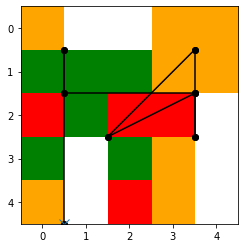

In [49]:
trajectories = trajectory_best
print(sum(map(sum,trajectories.cost)))
# create discrete colormap
cmap = colors.ListedColormap(['red', 'orange','green','white'])
bounds = [0,n,n*2]
norm = colors.BoundaryNorm(bounds, cmap.N)
# create color map for graphing
new_map = np.zeros([n*2,n*2])
Done = False
print(trajectories.weather_map)
i = 0

for color_map in trajectories.weather_map:
    j = 0
    for color in color_map:
        new_map[i,j] = color
        new_map[i+1,j] = color
        new_map[i,j+1] = color
        new_map[i+1,j+1] = color
        j+=2
    i+=2

count = 0
index = 0
for aircraft_trajectory in trajectories.trajectory:
    print('end position ',trajectories.aircraft_list[index].end_position)
    print('trajectory ',index,' ',aircraft_trajectory)
    print('cost: ',np.sum(trajectories.cost[count]))
    plt.figure()
    fig, ax = plt.subplots()
    ax.imshow(trajectories.weather_map, cmap=cmap)
    for i in range(0,len(aircraft_trajectory)-1):
        plt.plot([aircraft_trajectory[i][0]+.5,aircraft_trajectory[i+1][0]+.5],[aircraft_trajectory[i][1]+.5,aircraft_trajectory[i+1][1]+.5], 'ko-')
    plt.plot(trajectories.aircraft_list[index].end_position[0]+.5,trajectories.aircraft_list[index].end_position[1]+.5, 'x',markersize=10)
    plt.show()
    index += 1
    count += 1

In [50]:
# hill climbing
trajectories = copy.deepcopy(initial_traj)
trajectories.edit_trajectory(1,k,n)
# current state splice index
index = np.random.randint(1,min(map(len,trajectories.trajectory)))
# current best
trajectory_best = copy.deepcopy(trajectories)

#loop until system is cooled
while True:
    #print(index)
    # Edit trajectory at splice
    trajectories.edit_trajectory(index,k,n)
    new_trajectories = copy.deepcopy(trajectories)
    
    # Solution energy
    cost_curr = sum(map(sum,trajectory_best.cost))
    cost_next = sum(map(sum,new_trajectories.cost))
    
    # keep track of best solution
    if (cost_next < cost_curr):
        trajectory_best = copy.deepcopy(new_trajectories)
    else:
        break

    # update state splice
    index += 1
    if (index >= min(map(len,trajectories.trajectory))):
        break

151.53364973070458
[[1 3 3 1 1]
 [2 2 2 1 1]
 [0 2 0 0 3]
 [2 3 2 1 3]
 [1 3 0 1 3]]
end position  [0, 4]
trajectory  0   [[4, 0], [2, 2], [1, 1], [2, 2], [3, 3], [4, 3], [4, 4], [4, 3], [4, 4], [3, 3], [4, 4], [3, 3], [3, 4], [4, 4], [3, 4], [3, 3], [4, 4], [4, 3], [3, 4], [2, 3], [3, 2], [4, 2], [4, 1], [3, 0], [2, 0], [1, 1], [1, 0], [2, 1], [1, 1], [1, 2], [2, 3], [2, 4], [3, 3], [2, 3], [2, 4], [3, 3], [3, 4], [2, 4], [3, 3], [2, 4], [3, 4], [2, 3], [1, 2], [1, 3], [1, 4], [0, 3], [1, 3], [2, 3], [2, 2], [1, 1], [1, 2], [2, 1], [3, 1], [2, 1], [3, 2], [2, 2], [3, 1], [2, 1], [1, 2], [0, 3], [1, 3], [2, 3], [1, 3], [1, 4], [0, 4]]
cost:  151.5336497307046


<Figure size 432x288 with 0 Axes>

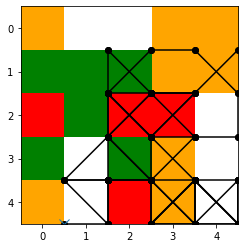

In [51]:
trajectories = trajectory_best
print(sum(map(sum,trajectories.cost)))
# create discrete colormap
cmap = colors.ListedColormap(['red', 'orange','green','white'])
bounds = [0,n,n*2]
norm = colors.BoundaryNorm(bounds, cmap.N)
# create color map for graphing
new_map = np.zeros([n*2,n*2])
Done = False
print(trajectories.weather_map)
i = 0

for color_map in trajectories.weather_map:
    j = 0
    for color in color_map:
        new_map[i,j] = color
        new_map[i+1,j] = color
        new_map[i,j+1] = color
        new_map[i+1,j+1] = color
        j+=2
    i+=2

count = 0
index = 0
for aircraft_trajectory in trajectories.trajectory:
    print('end position ',trajectories.aircraft_list[index].end_position)
    print('trajectory ',index,' ',aircraft_trajectory)
    print('cost: ',np.sum(trajectories.cost[count]))
    plt.figure()
    fig, ax = plt.subplots()
    ax.imshow(trajectories.weather_map, cmap=cmap)
    for i in range(0,len(aircraft_trajectory)-1):
        plt.plot([aircraft_trajectory[i][0]+.5,aircraft_trajectory[i+1][0]+.5],[aircraft_trajectory[i][1]+.5,aircraft_trajectory[i+1][1]+.5], 'ko-')
    plt.plot(trajectories.aircraft_list[index].end_position[0]+.5,trajectories.aircraft_list[index].end_position[1]+.5, 'x',markersize=10)
    plt.show()
    index += 1
    count += 1